# Polynomial Regression <hr>
## Polynomial Regression 理論概述

### Regression Equation

![](回歸方程式.PNG)

這邊主要在介紹幾種回歸的本身的差異：<br>
1.簡單線性回歸 ：截距項+單一變數 $X_1$ 的線性方程式。<br>
2.複回歸      ：截距項+多個變數 $X_1$~$X_n$的線性方程式。<br>
3.多項式回歸   ：截距項+單一變數 $X_1^n$的非線性方程式，屬於複回歸的一種特例。<hr>

### Simple Linear Regression Plot

![](plot_simple.PNG)

### Ploynomial Regression Plot

![](plot_ploynomial.PNG)

### why <span style="color:blue">"Linear"</span>?
通常在判斷是否為線性方程式時，不是在觀察$X$變數是否為線性，而是去觀察它的係數<span style="color:red">$b_n$</span>是否可以用線性組合來表達，可不可以再加上$X$的值去預測出$Y$，所以線性還非線性是去看係數，當係數相對於$Y$呈線性關係，即稱線性模型。
***

## Python範例

### 分成幾個部分：<br>
 1.資料集說明。<br> 
 2.資料預處理。<br>
 3.建立預測模型。<br>
 4.圖形比較。 <br>
 5.預測比較。<hr>

### <span style="color:blue">1.資料集說明 </span>

![](dataset.PNG)

<span style="color:blue">情境描述</span> ：有一個公司的人資團隊為了要雇用新員工，在面試的過程中談論到預期薪資，面試者說他過去有20年以上的工作經驗，前一份工作年薪16萬，所以預期年薪不低於原薪水，而人資向面試者前公司索取他們各職等的年薪，人資根據面試者在此的經歷(<span style="color:blue">Region Manager</span>兩年 ，且平均四年可以往上升一階，所以約在<span style="color:red">6.5</span> 的職等上)，去判斷他說的年薪真假與否。<br>

此資料集共有三個欄位：職位(Position)、職等(Level)、年薪(Salary)。而職位和職等是屬於相同的概念，所以我們只取<span style="color:red">職等(Level)</span>、<span style="color:red">年薪(Salary)</span>兩個欄位，用 $X$ 職等(Level) 對 $Y$ 年薪(Salary)進行預測。<Hr>


### <span style="color:blue">2.資料預處理 </span>

#### 載入套件

In [1]:
#Polynomial Regression
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#### 修改當下檔案開啟目錄

In [2]:
os.chdir("/Users/aa006/Desktop/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression")

#### 載入資料

In [3]:
#Importing the dataset
dataset  =pd.read_csv('Position_Salaries.csv')
X =dataset.iloc[:,1:2].values
y =dataset.iloc[:,2].values

因為資料筆數過少(10筆)，所以作者在這邊沒有做 Data Split 。<br>
在這裡不做Data Split 有兩個原因，一個是資料筆數太少，二是我們需要很精確的預測結果，因為要用來談薪水，所以需要盡可能多的資訊。

In [4]:
X1 =dataset.iloc[:,1].values
print(X1)

[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
X2 =dataset.iloc[:,1:2].values
print(X2)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


如同前兩周提到的，在建立機器學習時X必須要視特徵矩陣，不能是vector，而Y則是要是vector。<br>
所以將  iloc[:,1]  要改成 iloc[:,1:<span style="color:red">2</span>] ，取<span style="color:red">職等(Level)</span>，但因為python是0開始，並且含下不含上，所以1:2。

### <span style="color:blue">3.建立預測模型</span> 

因為X變數只有一個，所以作者在這邊分別利用簡單線性回歸VS多項式回歸進行預測模型並且比較結果。

##### 簡單線性回歸

In [6]:
#Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#####  多項式回歸

In [7]:
#Fitting polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =2)
X_poly =poly_reg.fit_transform(X)
lin_reg2 =LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

為了比較一般線性和多項式回歸的差異，作者在這邊建立了兩個方程式，一個簡單線性回歸取名為lin_reg，一個多項式回歸取名為poly_reg。<br>
多項式回歸在執行前要利用預處理的library將多項式的class <span style="color:red">PolynomialFeatures</span>讀入。<br>
<span style="color:red">PolynomialFeatures</span>： 是用來生成由所有多項式的組合組成的新特徵矩陣，因為本範例只有一個變數$X$，所以只會產生[$1$,$X$,$X^2$]，如果有兩個變數$a$、$b$就變成[$1$,$a$,$b$,$a^2$,$ab$,$b^2$]。<br>
作者在這邊只使用了一個參數 <span style="color:red">degree</span>：多項式特徵的次方數，預設為2。<br>
然後再利用<span style="color:red">fit_transform</span> 去產生轉換後的新矩陣，再利用產生的X_poly去執行複回歸。

In [8]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
print(X_poly)

[[   1.    1.    1.]
 [   1.    2.    4.]
 [   1.    3.    9.]
 [   1.    4.   16.]
 [   1.    5.   25.]
 [   1.    6.   36.]
 [   1.    7.   49.]
 [   1.    8.   64.]
 [   1.    9.   81.]
 [   1.   10.  100.]]


##### 比較前後的差異<br>
$X$ 是原先的職等。<br>
$X$_$poly$ 是利用多項式產出的三個欄位，這裡可以看到原本的$X$在中間代表$X_1$，第三行是$X_1$的平方項，第一行則是常數(截距項)。<br>

### <span style="color:blue">4.圖形比較</span> 

再來分別對兩個模型做視覺化呈現，對實際資料做散佈圖，然後兩個模型作配適線。<br>
比較 前公司提供的年薪 與 回歸線的配適。<br>
##### 簡單線性回歸

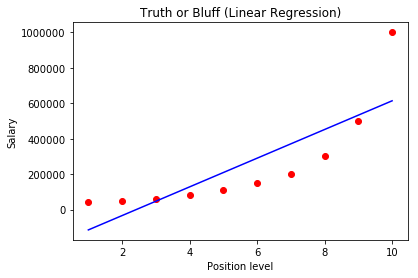

In [10]:
#visualising the linear regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg.predict(X),color ='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

show 是將圖準備好並顯示出來。

#####  多項式回歸 <br>
<span style="color:red">平方</span> 

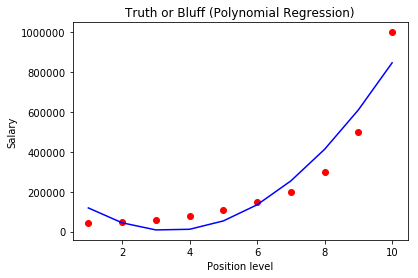

In [11]:
#visualising the polynomial regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

作者提到在這裡要注意的是放預測年薪時，建議不要直接放X_poly，因為X_poly是一個已經實際存在的特徵矩陣。<br>
如果在預測的部分使用poly_reg.fit_transform(X)的話，未來當有新的X值更新時，就可以執行抓到新的資料。<br>
***
<span style="color:red">三次方</span> 

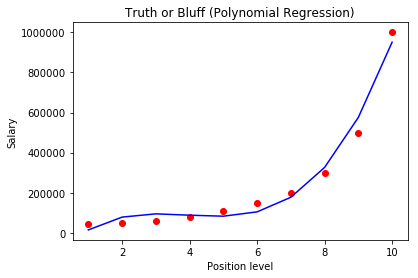

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =3)
X_poly =poly_reg.fit_transform(X)
lin_reg3 =LinearRegression()
lin_reg3.fit(X_poly,y)
#visualising the polynomial regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg3.predict(poly_reg.fit_transform(X)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

***
<span style="color:red">四次方</span> 

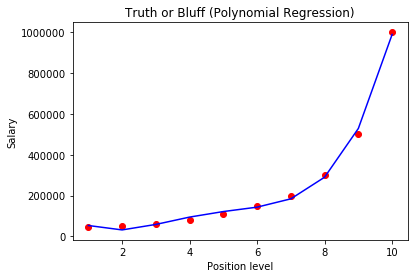

In [13]:
#Fitting polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =4)
X_poly =poly_reg.fit_transform(X)
lin_reg4 =LinearRegression()
lin_reg4.fit(X_poly,y)
#visualising the polynomial regression results
plt.scatter (X,y,color ='red')
plt.plot(X,lin_reg4.predict(poly_reg.fit_transform(X)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<span style="color:red">arange</span>是在給定的區間內進行等距切割，但是做完會是vector。<br>
所以要用<span style="color:red">reshape</span>轉換成矩陣。<br>
這個部分的處理是可以讓配適線更加平滑，因為畫配適線時是一點接一點，而不是讓X軸上切得更細，因為這個語法是寫在配適線的中。

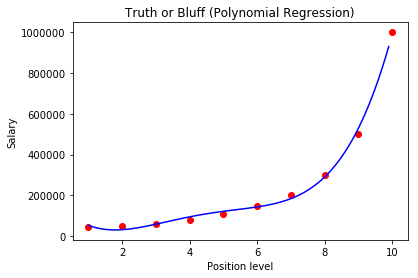

In [14]:
#Fitting polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree =4)
X_poly =poly_reg.fit_transform(X)
lin_reg5 =LinearRegression()
lin_reg5.fit(X_poly,y)
#visualising the polynomial regression results
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter (X,y,color ='red')
plt.plot(X_grid,lin_reg5.predict(poly_reg.fit_transform(X_grid)),color ='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

***
### <span style="color:blue">5.預測比較</span> 

#####  簡單線性回歸 

In [15]:
#predicting a new result with linear regression
lin_reg.predict(6.5)

array([ 330378.78787879])

#####  多項式回歸 

In [16]:
#predicting a new result with linear regression
lin_reg4.predict(poly_reg.fit_transform(6.5))

array([ 158862.45265153])

<span style="color:red">職等(Level)</span>在線性回歸預測為年薪33萬，多項式回歸預測為年薪15.9萬，而求職者說他在前公司年薪為16萬，看起來他是很誠實的。
***

## Regression 模板

課程把回歸章節整理了一份模板，這樣以後每次要建模前都可以拿出來用，但是只留通用的部分，其餘不同的部分等有需要再另外加。

In [ ]:
# Regression Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting the Regression Model to the dataset
# Create your regressor here

# Predicting a new result
y_pred = regressor.predict(6.5)

# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()